In [ ]:
#   !pip install numpy

In [18]:
import matplotlib.pyplot as plt
import numpy as np
import os
import csv




In [19]:

#   USE ESPONENTIAL OR CONSTANT
use_exp = True

if use_exp == True:
    distribution = "Exp"
elif use_exp == False:
    distribution = "Con"

#   target_tso = ["50"]
detailed = True
if detailed == True :
    target_tso = list(range(24, 51+1, 3) )
else :
    if use_exp == True :
        target_tso = ["25","30","35", "40", "45", "50"]
    elif use_exp == False:
        target_tso = ["25","30","35", "40", "45", "50"]


# USE ALL ITERATIONS OR ONLY FIRST
num_iterations = 30
use_all = True

target_tn = 30


# PROBABILITY
probability = 50

In [20]:
print(target_tso)

[24, 27, 30, 33, 36, 39, 42, 45, 48, 51]


In [21]:
#   run,type,module,name,attrname,attrvalue,value,count,sumweights,mean,stddev,min,max,vectime,vecvalue

#   testS3ExpP50_24_all.csv

#   scalar,J_Network.server_0,completedJob:mean
#   target_tso = ["24"]
    
r1 = "scalar"
r2 = "J_Network.server_"
r3 = "completedJob:mean"
server_names = [0, 1]

general_array = []
for srvn in range(0, len(server_names)):
    jrespTime_all_tsos = []
    for tso_this_iter in range(0, len(target_tso), 1) :
        #   print(tso_this_iter)
        jrespTime_all_this_tso = []
        file_name_csv = f'testS3{distribution}P{probability}_{target_tso[tso_this_iter]}_mean.csv'

        with open(f'../simulations/results/{file_name_csv}') as csv_file : 
            reader = csv.reader(csv_file)
            repetitions_counter = 0
            for row in reader:
                if row[1]==r1 and row[2] == f'{r2}{server_names[srvn]}' and row[3]==r3:
                    rigaTarget = list(row)
                    #   print("hit row : ", row)
                    #   hit row :  ['testExpP50-0-20240111-20:04:46-18804', 'scalar', 'J_Network.server_0', 'completedJob:mean', '', '', '2386.8933293034', '', '', '', '', '', '', '', '']
                    #   print("listed row : ", rigaTarget)
                    #   print("len : ", len(rigaTarget))    #   15 .
                    
                    this_row_mean = float( rigaTarget[6] )
                    jrespTime_all_this_tso.append(this_row_mean)
                    
                    print("mean : ", this_row_mean , " ; repetitions_counter : ", repetitions_counter)
                    repetitions_counter += 1
                    
                    if use_all == False:
                        print("break")
                        break
        
        jrespTime_all_tsos.append(jrespTime_all_this_tso)
        print(f'{file_name_csv} _ len : {len(jrespTime_all_tsos[tso_this_iter])}' )
    general_array.append(jrespTime_all_tsos)

mean :  1440.0  ; repetitions_counter :  0
mean :  1440.0  ; repetitions_counter :  1
mean :  1440.0  ; repetitions_counter :  2
mean :  1440.0  ; repetitions_counter :  3
mean :  1440.0  ; repetitions_counter :  4
mean :  1440.0  ; repetitions_counter :  5
mean :  1440.0  ; repetitions_counter :  6
mean :  1440.0  ; repetitions_counter :  7
mean :  1440.0  ; repetitions_counter :  8
mean :  1440.0  ; repetitions_counter :  9
mean :  1440.0  ; repetitions_counter :  10
mean :  1440.0  ; repetitions_counter :  11
mean :  1440.0  ; repetitions_counter :  12
mean :  1440.0  ; repetitions_counter :  13
mean :  1440.0  ; repetitions_counter :  14
mean :  1440.0  ; repetitions_counter :  15
mean :  1440.0  ; repetitions_counter :  16
mean :  1440.0  ; repetitions_counter :  17
mean :  1440.0  ; repetitions_counter :  18
mean :  1440.0  ; repetitions_counter :  19
mean :  1440.0  ; repetitions_counter :  20
mean :  1440.0  ; repetitions_counter :  21
mean :  1440.0  ; repetitions_counter :  2

In [ ]:
#   import pickle

In [ ]:
#   with open('./saving', 'wb') as file_pi:
#       pickle.dump(jqTime_all_tsos, file_pi)


In [ ]:
#   with open('./saving', "rb") as file_pi:
#       jqTime_all_tsos = pickle.load(file_pi)
    

In [22]:
def plot_confidence_interval(x, values, z=1.96, color='#2187bb', horizontal_line_width=0.01):
    mean = np.mean(values)
    stdev = np.std(values)
    confidence_interval = z * stdev / np.sqrt(len(values))

    left = x - horizontal_line_width / 2
    top = mean - confidence_interval
    right = x + horizontal_line_width / 2
    bottom = mean + confidence_interval
    plt.plot([x, x], [top, bottom], color=color)
    plt.plot([left, right], [top, top], color=color)
    plt.plot([left, right], [bottom, bottom], color=color)
    plt.plot(x, mean, 'o', color=color)

    #   plt.plot( [x,x] , [top, top] , color = '#052BFF')

    return mean, confidence_interval

this_mean :  1440.0
this_mean :  1620.0
this_mean :  1800.0
this_mean :  2070.0
this_mean :  2340.0
this_mean :  2610.0
this_mean :  2880.0
this_mean :  3150.1270513499207
this_mean :  167580.0
this_mean :  312654.126126126


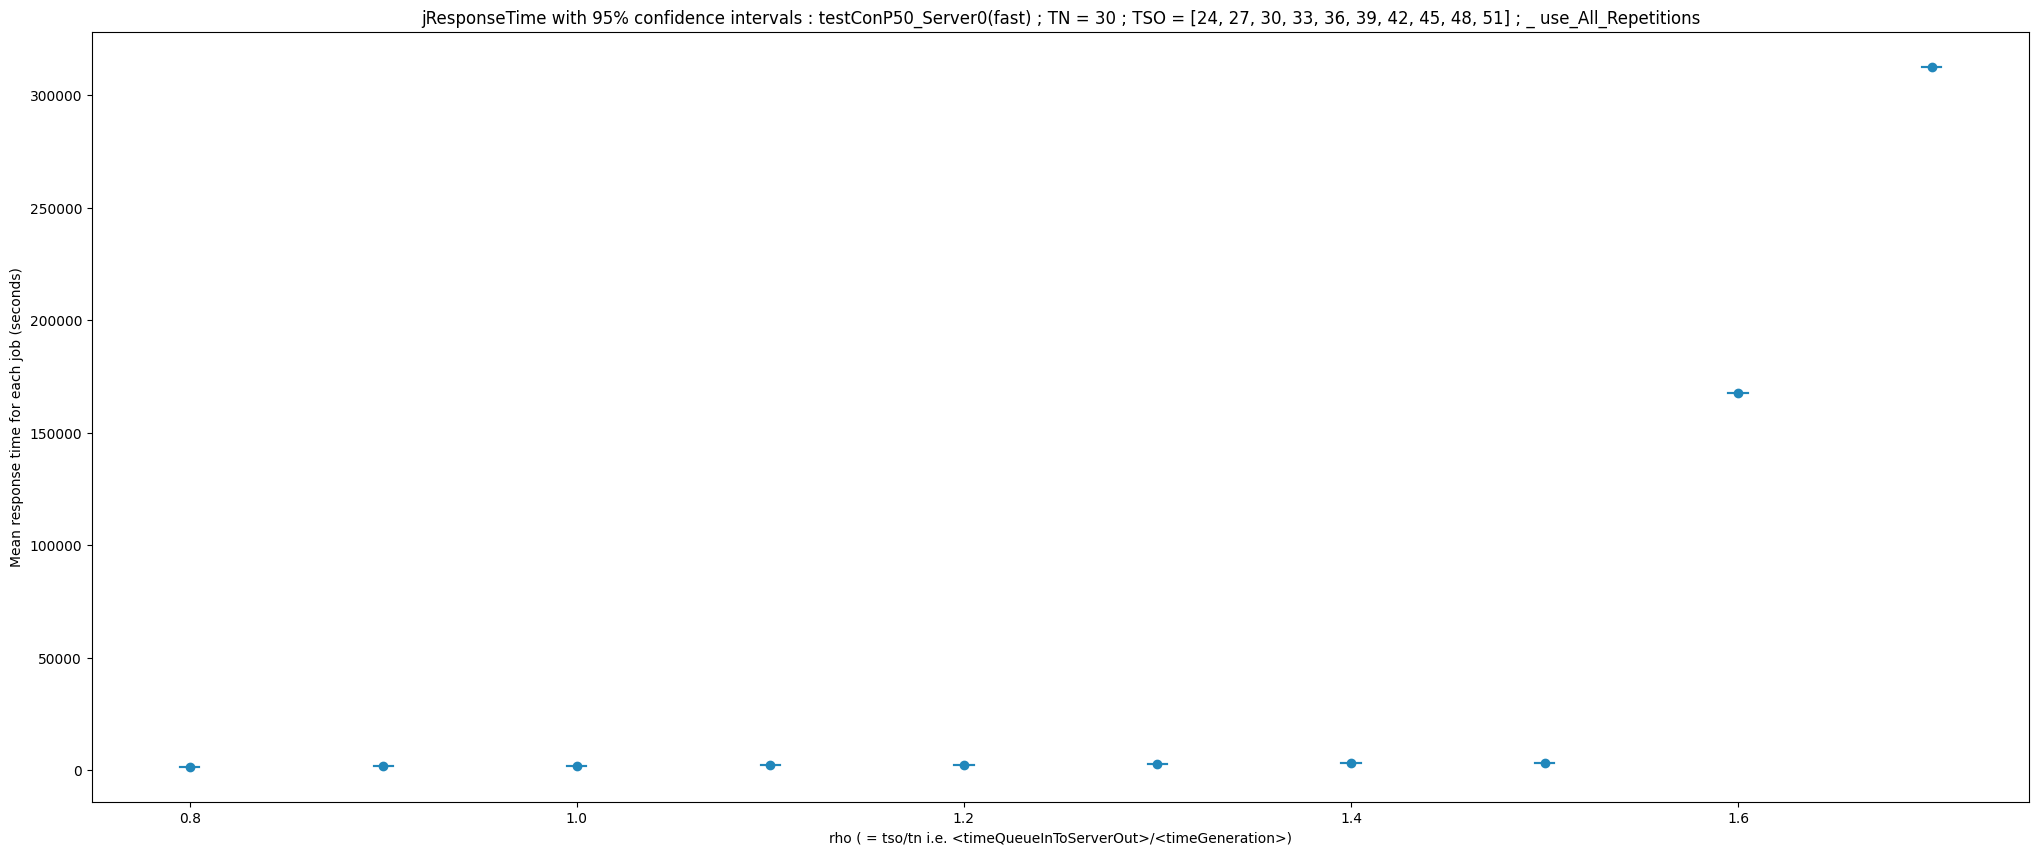

this_mean :  2880.0
this_mean :  3240.0
this_mean :  3600.0
this_mean :  3960.0
this_mean :  4320.0
this_mean :  4680.0
this_mean :  5040.0
this_mean :  5400.0
this_mean :  169920.0
this_mean :  315000.0


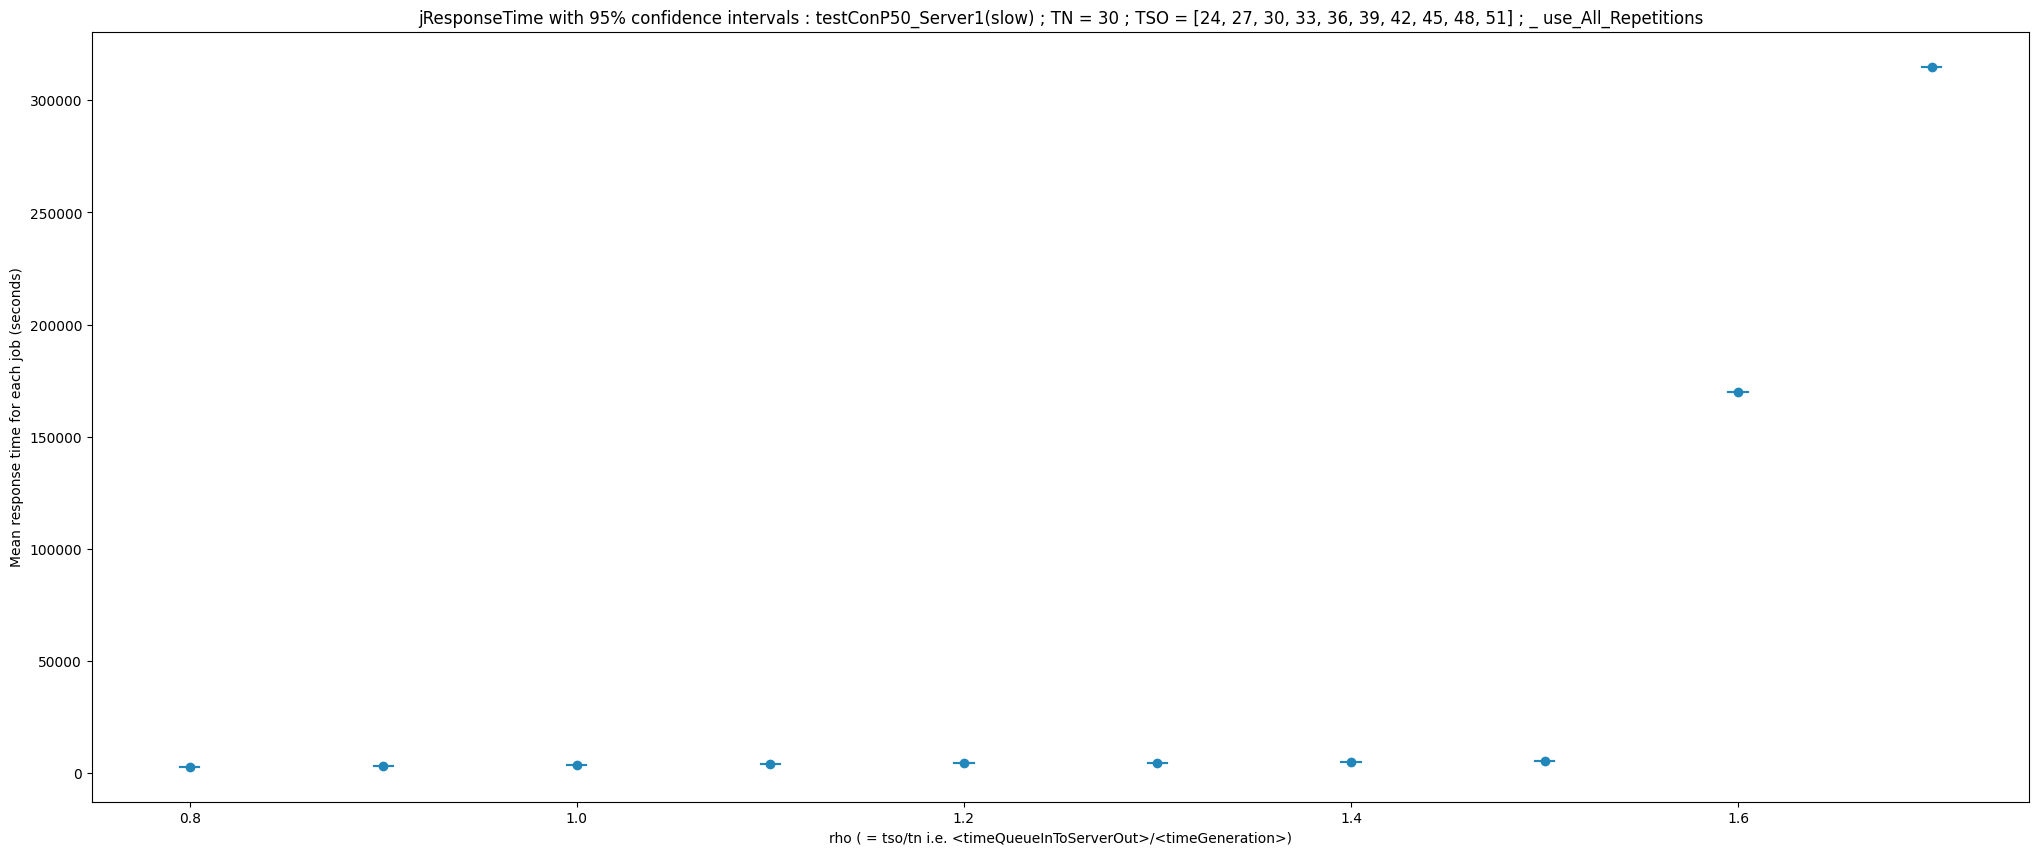

In [23]:
#	we studying completed job mean time !
#	#	r1 = "scalar"
#	#	r2 = "J_Network.server_"
#	#	r3 = "completedJob:mean"

plot_dir = f'../images/plots' 

for srvn in range(0, len(server_names)):
	plt.rcParams["figure.figsize"] = (25, 10)
	for tso_this_iter in range(0, len(target_tso), 1) :
		this_tso_averages = general_array[srvn][tso_this_iter]
		#	print(this_tso_averages)
		#	print("tipo di this_tso_averages : ", type(this_tso_averages))
		#	print("tipo di this_tso_averages[0] : ", type(this_tso_averages[0]))
		#	print("tipo di target_tn : ", type(target_tn))
		#	#	tipo di this_tso_averages :  <class 'list'>
		#	#	tipo di this_tso_averages[0] :  <class 'float'>
		#	#	tipo di target_tn :  <class 'float'>
		this_mean , this_conf_int = plot_confidence_interval( float(target_tso[tso_this_iter])/float(target_tn) , np.array(this_tso_averages))
		print("this_mean : ", this_mean)
		#	print(this_conf_int)

	#	rho = np.linspace(0.05, 2, 100)
	#	rho = rho 
	#	plt.plot(rho, rho**2/(1-rho)   , color='r', label="rho^2/(1-rho)")
	#	plt.legend(loc="upper left")
		
	extras = ["fast", "slow"]
	name = f'jResponseTime with 95% confidence intervals : test{distribution}P{probability}_Server{srvn}({extras[srvn]})'
	if use_all == True: 
		plt.title(f"{name} ; TN = 30 ; TSO = {target_tso} ; _ use_All_Repetitions")
        

	plt.ylabel("Mean response time for each job (seconds)")
	plt.xlabel("rho ( = tso/tn i.e. <timeQueueInToServerOut>/<timeGeneration>)")
     
	save = False
	if save == True:
		if use_all == True: 
			plt.savefig(f'{plot_dir}/jResTime_ConfidenceIntervals_plot{distribution}P{probability}_{target_tso[tso_this_iter]}_Server{srvn}.png')
		else :
			plt.savefig(f'{plot_dir}/jResTime_ConfidenceIntervals_plot{distribution}P{probability}_{target_tso[tso_this_iter]}_onlyIterZero_Server{srvn}.png')
	
	plt.show()





In [25]:
print("before merge")
print(general_array[0][7])
print(general_array[1][7])

print(len(general_array[0][7]))
print(len(general_array[1][7]))

before merge
[3150.0, 3150.2382212811, 3150.2382212811, 3150.2382212811, 3150.0, 3150.2382212811, 3150.0, 3150.0, 3150.0, 3150.2382212811, 3150.0, 3150.0, 3150.2382212811, 3150.2382212811, 3150.0, 3150.2382212811, 3150.2382212811, 3150.0, 3150.2382212811, 3150.2382212811, 3150.0, 3150.2382212811, 3150.0, 3150.0, 3150.2382212811, 3150.0, 3150.2382212811, 3150.2382212811, 3150.2382212811, 3150.0]
[5400.0, 5400.0, 5400.0, 5400.0, 5400.0, 5400.0, 5400.0, 5400.0, 5400.0, 5400.0, 5400.0, 5400.0, 5400.0, 5400.0, 5400.0, 5400.0, 5400.0, 5400.0, 5400.0, 5400.0, 5400.0, 5400.0, 5400.0, 5400.0, 5400.0, 5400.0, 5400.0, 5400.0, 5400.0, 5400.0]
30
30


# MERGE

In [28]:
import matplotlib.pyplot as plt
import numpy as np
import os
import csv


In [30]:
#   USE ESPONENTIAL OR CONSTANT
use_exp = False

if use_exp == True:
    distribution = "Exp"
elif use_exp == False:
    distribution = "Con"

#   target_tso = ["50"]
detailed = True
if detailed == True :
    target_tso = list(range(24, 51+1, 3) )
else :
    if use_exp == True :
        target_tso = ["25","30","35", "40", "45", "50"]
    elif use_exp == False:
        target_tso = ["25","30","35", "40", "45", "50"]


# USE ALL ITERATIONS OR ONLY FIRST
num_iterations = 30
use_all = True

target_tn = 30


# PROBABILITY
probability = 50

In [31]:
print( len(target_tso) )

10


In [33]:
# merge servers

# scalar,J_Network.server_0,completedJob:mean

r1 = "scalar"
r2 = "J_Network.server_"
r3 = "completedJob:mean"
server_names = [0, 1]

merged_array = []

for tso_this_iter in range(0, len(target_tso), 1) :
    #   print(tso_this_iter)
    jrespTime_all_this_tso = []
    file_name_csv = f'testS3{distribution}P{probability}_{target_tso[tso_this_iter]}_mean.csv'

    for srvn in range(0, len(server_names)):
        with open(f'../simulations/results/{file_name_csv}') as csv_file : 
            reader = csv.reader(csv_file)
            repetitions_counter = 0
            for row in reader:
                if row[1]==r1 and row[2] == f'{r2}{server_names[srvn]}' and row[3]==r3:
                    rigaTarget = list(row)
                    #   print("hit row : ", row)
                    #   hit row :  ['testExpP50-0-20240111-20:04:46-18804', 'scalar', 'J_Network.server_0', 'completedJob:mean', '', '', '2386.8933293034', '', '', '', '', '', '', '', '']
                    #   print("listed row : ", rigaTarget)
                    #   print("len : ", len(rigaTarget))    #   15 .
                    
                    this_row_mean = float( rigaTarget[6] )

                    #   if tso_this_iter==7 :
                    #       print("server", srvn, " ;tso ", tso_this_iter, " ;mean :", this_row_mean)
                    
                    jrespTime_all_this_tso.append(this_row_mean)
                    
                    #   print("mean : ", this_row_mean , " ; repetitions_counter : ", repetitions_counter)
                    #   repetitions_counter += 1
                    
                    if use_all == False:
                        print("break")
                        break
        
    merged_array.append(jrespTime_all_this_tso)


In [34]:
print("after merge")
print(len(merged_array))
print(merged_array[7])
print(len(merged_array[7]))

after merge
10
[3150.0, 3150.2382212811, 3150.2382212811, 3150.2382212811, 3150.0, 3150.2382212811, 3150.0, 3150.0, 3150.0, 3150.2382212811, 3150.0, 3150.0, 3150.2382212811, 3150.2382212811, 3150.0, 3150.2382212811, 3150.2382212811, 3150.0, 3150.2382212811, 3150.2382212811, 3150.0, 3150.2382212811, 3150.0, 3150.0, 3150.2382212811, 3150.0, 3150.2382212811, 3150.2382212811, 3150.2382212811, 3150.0, 5400.0, 5400.0, 5400.0, 5400.0, 5400.0, 5400.0, 5400.0, 5400.0, 5400.0, 5400.0, 5400.0, 5400.0, 5400.0, 5400.0, 5400.0, 5400.0, 5400.0, 5400.0, 5400.0, 5400.0, 5400.0, 5400.0, 5400.0, 5400.0, 5400.0, 5400.0, 5400.0, 5400.0, 5400.0, 5400.0]
60


In [35]:
sums_merg = []

#   #   #   #   scalar,J_Network.server_0,completedJob:sum (NO)
#   scalar,J_Network.sink_0,recvJob:sum
# merge servers

r1 = "scalar"
r2 = "J_Network.sink_"
r3 = "recvJob:sum"
server_names = [0, 1]

for tso_this_iter in range(0, len(target_tso), 1) :
    #   print(tso_this_iter)
    sums_jrespTime_all_this_tso = []
    file_name_csv = f'testS3{distribution}P{probability}_{target_tso[tso_this_iter]}_sum.csv'

    for srvn in range(0, len(server_names)):
        with open(f'../simulations/results/{file_name_csv}') as csv_file : 
            reader = csv.reader(csv_file)
            repetitions_counter = 0
            for row in reader:
                if row[1]==r1 and row[2] == f'{r2}{server_names[srvn]}' and row[3]==r3:
                    rigaTarget = list(row)
                                        
                    this_row_sum = float( rigaTarget[6] )

                    #   if tso_this_iter==7 :
                    #       print("server", srvn, " ; tso ", tso_this_iter, " ; mean :", this_row_sum)
                    
                    sums_jrespTime_all_this_tso.append(this_row_sum)
                                      
                    if use_all == False:
                        print("break")
                        break
        
    sums_merg.append(sums_jrespTime_all_this_tso)


In [36]:
print("after merge")
print(len(sums_merg))
print(sums_merg[7])
print(len(sums_merg[7]))

after merge
10
[1888.0, 1889.0, 1889.0, 1889.0, 1888.0, 1889.0, 1888.0, 1888.0, 1888.0, 1889.0, 1888.0, 1888.0, 1889.0, 1889.0, 1888.0, 1889.0, 1889.0, 1888.0, 1889.0, 1889.0, 1888.0, 1889.0, 1888.0, 1888.0, 1889.0, 1888.0, 1889.0, 1889.0, 1889.0, 1888.0, 944.0, 944.0, 944.0, 944.0, 944.0, 944.0, 944.0, 944.0, 944.0, 944.0, 944.0, 944.0, 944.0, 944.0, 944.0, 944.0, 944.0, 944.0, 944.0, 944.0, 944.0, 944.0, 944.0, 944.0, 944.0, 944.0, 944.0, 944.0, 944.0, 944.0]
60


In [37]:
weighted_merge = []
for tso_this_iter in range(0, len(target_tso), 1) :
    it = 0
    #   print(len (sums_merg[tso_this_iter]) )
    #   print(len (merged_array[tso_this_iter]) )
    merge_this_tso = []
    while it < num_iterations :
        prod_s0 = sums_merg[tso_this_iter][it] * merged_array[tso_this_iter][it]
        prod_s1 = sums_merg[tso_this_iter][it+num_iterations] * merged_array[tso_this_iter][it+num_iterations]
        num_jobs_both_servers = sums_merg[tso_this_iter][it] + sums_merg[tso_this_iter][it+num_iterations]

        weighted_avg = ( prod_s0 + prod_s1 ) / num_jobs_both_servers
        
        #   if tso_this_iter == 7 :
        #       print(f'it_{it} : ({sums_merg[tso_this_iter][it]}*{merged_array[tso_this_iter][it]})+({sums_merg[tso_this_iter][it+num_iterations]}*{merged_array[tso_this_iter][it+num_iterations]}) = {prod_s0 + prod_s1} , avg = {weighted_avg}' )
        
        merge_this_tso.append(weighted_avg)

        it += 1
    weighted_merge.append(merge_this_tso)

# 1872.0 * 2880.0 , 1894.0 * 2880.0 -> 
    

In [38]:
print(weighted_merge)
print( len(weighted_merge ))
print( len(weighted_merge[7] ))

[[1928.135593220339, 1916.949152542373, 1927.1186440677966, 1929.9964701729616, 1922.0338983050847, 1918.4745762711864, 1934.2372881355932, 1942.5503355704698, 1916.2725026473702, 1917.457627118644, 1928.9798799858806, 1926.1016949152543, 1920.5084745762713, 1916.949152542373, 1925.084745762712, 1913.0483927940656, 1922.542372881356, 1925.4218143310977, 1927.4549947052594, 1923.388633956936, 1907.7966101694915, 1917.1176262804663, 1928.6440677966102, 1912.8813559322034, 1913.5570469798658, 1897.7887672200636, 1922.542372881356, 1922.204168138467, 1922.3720437698553, 1921.695513952667], [2169.1525423728813, 2156.5677966101694, 2168.008474576271, 2171.2460289445817, 2162.2881355932204, 2158.2838983050847, 2176.0169491525426, 2185.3691275167785, 2155.8065654782918, 2157.1398305084745, 2170.102364984116, 2166.864406779661, 2160.572033898305, 2156.5677966101694, 2165.7203389830506, 2152.179441893324, 2162.8601694915255, 2166.099541122485, 2168.386869043417, 2163.8122132015533, 2146.27118644

In [39]:
def plot_confidence_interval(x, values, z=1.96, color='#2187bb', horizontal_line_width=0.01):
    mean = np.mean(values)
    stdev = np.std(values)
    confidence_interval = z * stdev / np.sqrt(len(values))

    left = x - horizontal_line_width / 2
    top = mean - confidence_interval
    right = x + horizontal_line_width / 2
    bottom = mean + confidence_interval
    plt.plot([x, x], [top, bottom], color=color)
    plt.plot([left, right], [top, top], color=color)
    plt.plot([left, right], [bottom, bottom], color=color)
    plt.plot(x, mean, 'o', color=color)

    #   plt.plot( [x,x] , [top, top] , color = '#052BFF')

    return mean, confidence_interval

tso_this_iter :  24  ; this_mean :  1921.6435272541357
tso_this_iter :  27  ; this_mean :  2161.848968160903
tso_this_iter :  30  ; this_mean :  2700.0
tso_this_iter :  33  ; this_mean :  2700.0
tso_this_iter :  36  ; this_mean :  3000.0
tso_this_iter :  39  ; this_mean :  3300.0
tso_this_iter :  42  ; this_mean :  3600.0
tso_this_iter :  45  ; this_mean :  3899.943522767383
tso_this_iter :  48  ; this_mean :  168360.0
tso_this_iter :  51  ; this_mean :  313436.2241793434


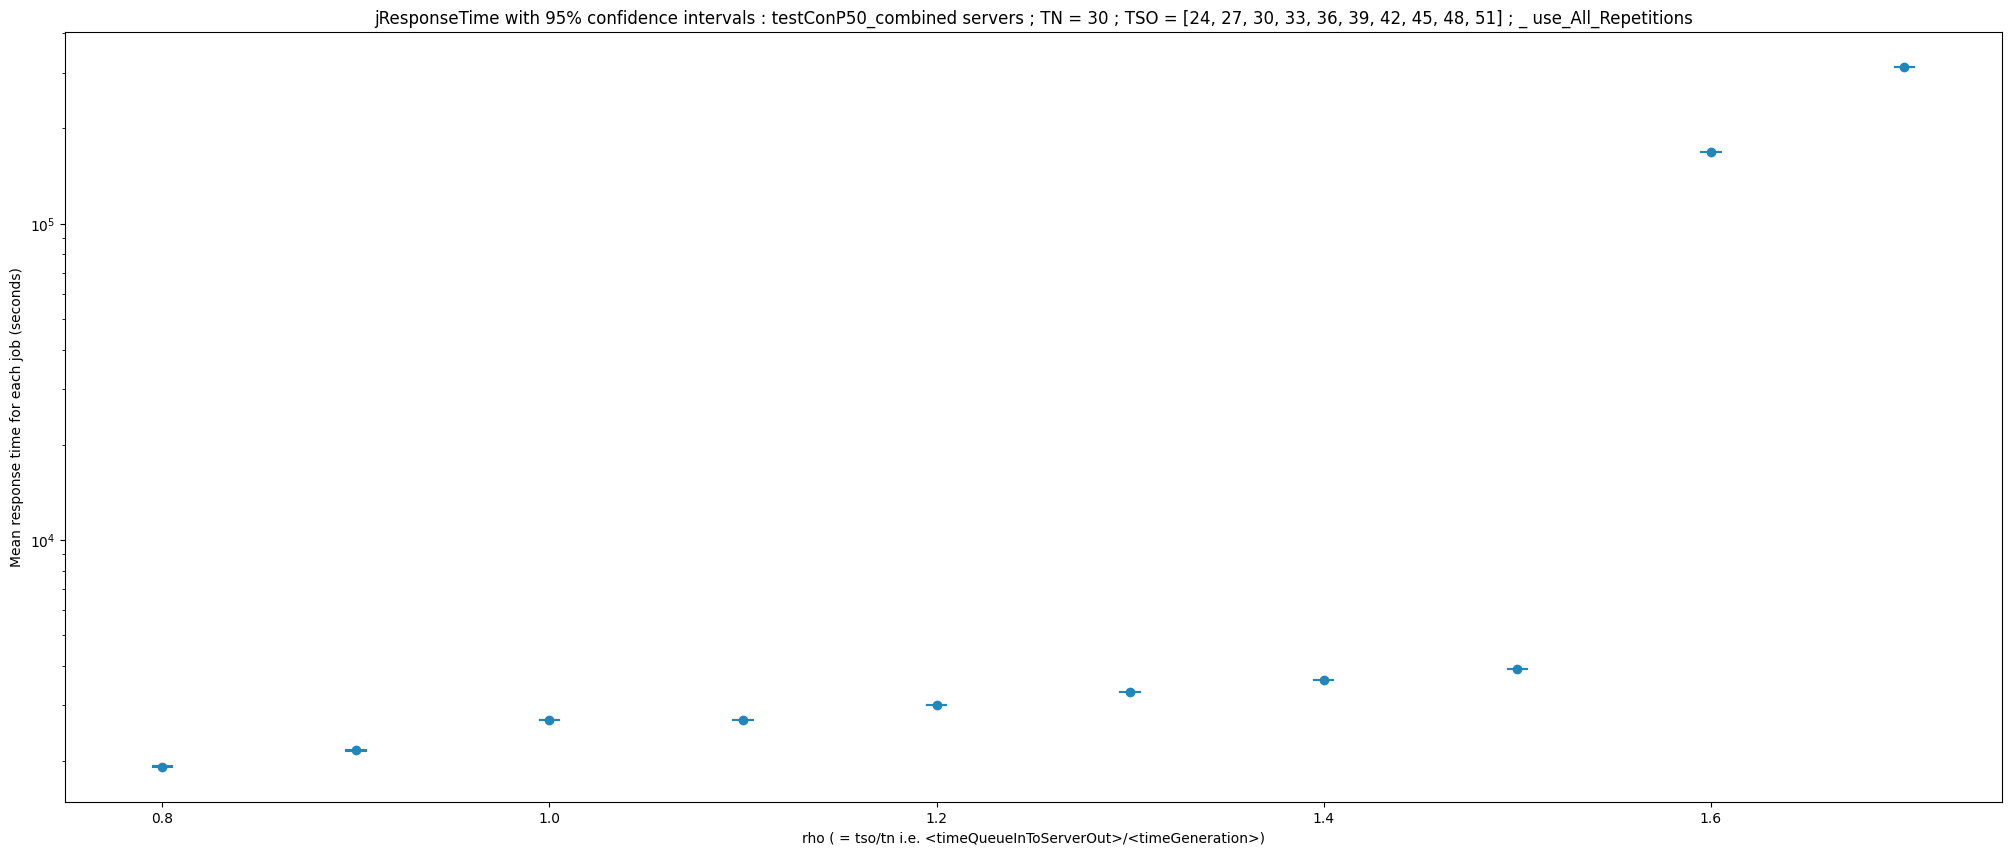

In [41]:


plot_dir = f'../images/plots' 

plt.rcParams["figure.figsize"] = (25, 10)
for tso_this_iter in range(0, len(target_tso), 1) :
    this_tso_averages = weighted_merge[tso_this_iter]
    #	print(this_tso_averages)
    #	print("tipo di this_tso_averages : ", type(this_tso_averages))
    #	print("tipo di this_tso_averages[0] : ", type(this_tso_averages[0]))
    #	print("tipo di target_tn : ", type(target_tn))
    #	#	tipo di this_tso_averages :  <class 'list'>
    #	#	tipo di this_tso_averages[0] :  <class 'float'>
    #	#	tipo di target_tn :  <class 'float'>
    this_mean , this_conf_int = plot_confidence_interval( float(target_tso[tso_this_iter])/float(target_tn) , np.array(this_tso_averages))
    print("tso_this_iter : ", target_tso[tso_this_iter], " ; this_mean : ", this_mean)
    #	print(this_conf_int)

#	rho = np.linspace(0.05, 2, 100)
#	rho = rho 
#	plt.plot(rho, rho**2/(1-rho)   , color='r', label="rho^2/(1-rho)")
#	plt.legend(loc="upper left")
    
extras = ["fast", "slow"]
name = f'jResponseTime with 95% confidence intervals : test{distribution}P{probability}_combined servers'
if use_all == True: 
    plt.title(f"{name} ; TN = 30 ; TSO = {target_tso} ; _ use_All_Repetitions")
    

plt.ylabel("Mean response time for each job (seconds)")
plt.xlabel("rho ( = tso/tn i.e. <timeQueueInToServerOut>/<timeGeneration>)")
    
save = False
if save == True:
    if use_all == True: 
        plt.savefig(f'{plot_dir}/jResTime_ConfidenceIntervals_plot{distribution}P{probability}_{target_tso[tso_this_iter]}_Server{srvn}.png')
    else :
        plt.savefig(f'{plot_dir}/jResTime_ConfidenceIntervals_plot{distribution}P{probability}_{target_tso[tso_this_iter]}_onlyIterZero_Server{srvn}.png')


use_log = True
if use_log :
    plt.yscale('log')
plt.show()


( 3150*2 + 5400 ) / 3 = 3900

formula era : 13/9 * tso = 13/9 * 45*60 = 3900 nice :>